In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
ds = xr.open_dataset("zarr-stores/loss.nc")
ds.load()

<xarray.Dataset> Size: 239kB
Dimensions:        (optim_step: 4600, var_index: 7, var_names: 7)
Coordinates:
  * optim_step     (optim_step) int64 37kB 0 1 2 3 4 ... 4596 4597 4598 4599
  * var_index      (var_index) int64 56B 0 1 2 3 4 5 6
  * var_names      (var_names) <U7 196B 'temp' 'tmp' 'so' ... 'pressfc' 'SSH'
Data variables:
    loss           (optim_step) float32 18kB 3.284 3.214 3.116 ... 1.214 1.218
    loss_valid     (optim_step) float32 18kB 3.176 3.253 2.972 ... 1.219 1.201
    loss_by_var    (var_index, optim_step) float32 129kB 0.546 0.5848 ... 0.7427
    learning_rate  (optim_step) float64 37kB nan nan nan nan ... nan nan nan nan
Attributes:
    batch_size:  16

/tmp/ipykernel_4070734/1976551034.py:3: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  stride = int(ds.dims["optim_step"]/epochs)


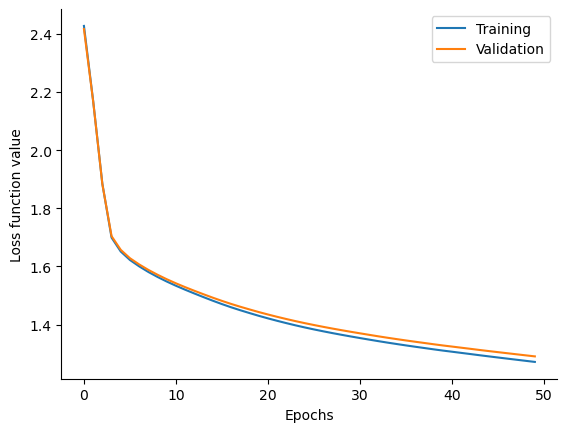

In [12]:
fig, ax = plt.subplots()
epochs = 50
stride = int(ds.dims["optim_step"]/epochs)
loss = [np.mean(ds.loss[stride*i:(i+1)*stride]) for i in range(epochs)]
loss_valid = [np.mean(ds.loss_valid[stride*i:(i+1)*stride]) for i in range(epochs)]

ax.plot(loss, label="Training")
ax.plot(loss_valid, label="Validation")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel("Epochs"); plt.ylabel('Loss function value')
plt.legend()
fig.savefig("loss.png")
plt.show()

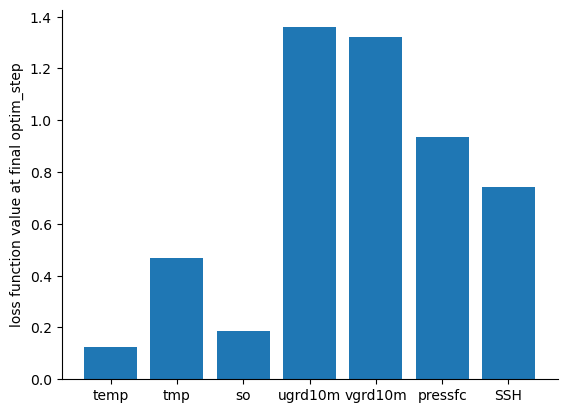

In [6]:
fig, ax = plt.subplots()
plt.bar(
    x=ds.var_index,
    height=ds.loss_by_var.isel(optim_step=-1),
)

ax.set(
    xticks=ds.var_index.values,
    xticklabels=ds.var_names.values,
    ylabel="loss function value at final optim_step",
);

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

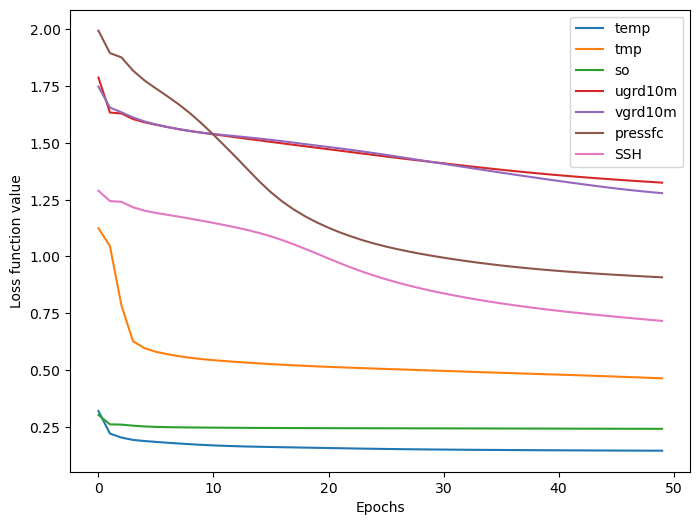

In [35]:
# loss per variable over the number of epochs
loss_by_var = np.zeros((ds.sizes['var_index'], epochs))
for i in range(ds.sizes['var_index']):
    loss_by_var[i,:] = [np.mean(ds.loss_by_var[i, stride*j:(j+1)*stride]) for j in range(epochs)]

fig, ax = plt.subplots(figsize=(8,6))
for i in ds.coords['var_index']:
    ax.plot(loss_by_var[i, :], label=ds.coords['var_names'][i].values)
plt.legend(loc='upper right')
plt.xlabel('Epochs'); plt.ylabel('Loss function value')
plt.savefig('loss_by_var.png', dpi=300)
plt.show()